# 5.4. Estabilidade Numérica e Inicialização


A escolha do esquema de inicialização desempenha um papel significativo na aprendizagem da rede neural e pode ser crucial para manter a estabilidade numérica. 

Além disso, essas escolhas podem estar ligadas de maneiras interessantes à escolha da função de ativação não linear. Qual função escolhemos e como inicializamos os parâmetros podem determinar a rapidez com que nosso algoritmo de otimização converge. Escolhas erradas aqui podem fazer com que encontremos gradientes que explodem ou desaparecem durante o treinamento.

In [2]:
%matplotlib inline
import torch
from d2l import torch as d2l

# 5.4.1. Gradientes desaparecendo e explodindo

Podemos estar enfrentando atualizações de parâmetros que são 

(i) excessivamente grandes, destruindo nosso modelo (o problema do gradiente explosivo ); ou 

(ii) excessivamente pequeno (o problema do gradiente evanescente ), tornando o aprendizado impossível, pois os parâmetros dificilmente se movem a cada atualização.

# 5.4.1.1. Gradientes desaparecendo

Um culpado frequente que causa o problema do gradiente evanescente é a escolha da função de ativação
que é anexado após as operações lineares de cada camada

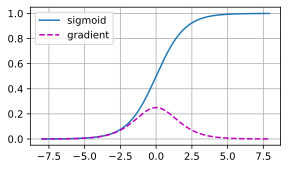

In [3]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

Como você pode ver, o gradiente do sigmóide desaparece tanto quando suas entradas são grandes quanto quando são pequenas.

Esse problema costumava atormentar o treinamento profundo de redes. Consequentemente, os ReLUs, que são mais estáveis ​​(mas menos plausíveis do ponto de vista neural), surgiram como a escolha padrão para os profissionais.

# 5.4.1.2. Explodindo Gradientes

Quando isso acontece devido à inicialização de uma rede profunda, não temos chance de fazer com que um otimizador de gradiente descendente convirja.

# 5.4.2. Inicialização de parâmetros

# 5.4.2.1. Inicialização padrão

Nas seções anteriores, por exemplo, na Seção 3.5 , usamos uma distribuição normal para inicializar os valores de nossos pesos. Se não especificarmos o método de inicialização, a estrutura usará um método de inicialização aleatória padrão, que geralmente funciona bem na prática para problemas de tamanhos moderados.



# 5.4.2.2. Inicialização Xavier

https://pytorch.org/docs/stable/nn.init.html

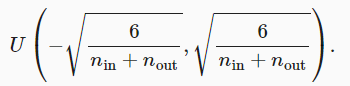

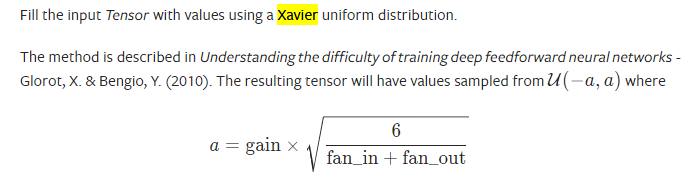

Embora a suposição de inexistência de não-linearidades no raciocínio matemático acima possa ser facilmente violada em redes neurais, o método de inicialização de Xavier acaba funcionando bem na prática.

Also known as Glorot initialization.

Parameters
tensor (Tensor) – an n-dimensional torch.Tensor

gain (float) – an optional scaling factor

generator (Optional[Generator]) – the torch Generator to sample from (default: None)

Return type
Tensor

In [6]:
# Examples
import torch
from torch import nn
from d2l import torch as d2l

w = torch.empty(3, 5)
nn.init.xavier_uniform_(w, gain=nn.init.calculate_gain('relu'))

tensor([[ 1.1232, -1.0273,  0.0039, -0.4513,  0.3743],
        [ 1.0238, -0.6612, -0.2537,  0.4873, -0.4488],
        [ 0.3703, -0.8515,  0.0042, -0.9287,  1.1006]])

# 5.4.3. Resumo

Gradientes que desaparecem e explodem são problemas comuns em redes profundas. É necessário muito cuidado na inicialização dos parâmetros para garantir que gradientes e parâmetros permaneçam bem controlados.

 A inicialização de Xavier sugere que, para cada camada, a variância de qualquer saída não é afetada pelo número de entradas, e a variância de qualquer gradiente não é afetada pelo número de saídas. As funções de ativação ReLU atenuam o problema do gradiente de desaparecimento. Isto pode acelerar a convergência.

 

# Exercícios

# Ex. 2. 
Can we initialize all weight parameters in linear regression or in softmax regression to the same value?

Initializing all weight parameters to the same value is generally not recommended due to the problems it can cause during training. Using appropriate weight initialization techniques can help the network converge faster and learn more meaningful representations.

To avoid these issues, it’s recommended to use appropriate weight initialization techniques. For example:

Glorot / Xavier Initialization: This initialization method sets the weights according to the size of the input and output dimensions of the layer. It helps prevent vanishing and exploding gradients by keeping the variance of the activations roughly constant across layers.

He Initialization: Similar to Glorot initialization, but specifically designed for ReLU activation functions, which are common in deep networks.

Random Initialization: Initializing weights with small random values from a suitable distribution (e.g., Gaussian distribution with mean 0 and small standard deviation) helps to break symmetry and allow each neuron to learn different features.

Pretrained Initialization: For transfer learning, you can use weights pre-trained on a related task. This provides a good starting point for training and can help avoid issues with random initialization.

acc: 0.20


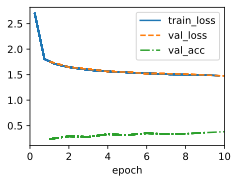

In [7]:
import torch
from torch import nn
from d2l import torch as d2l

# ------------------------------------------------------------------------------------
# ALTERANDO O CÓDIGO PARA ELIMINAR ERRO DE DATALOADER AO RODAR NO PYCHARM:
# FAZER num_workers=0 NA CLASSE FashionMNIST.

# return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
#                                    num_workers=0)

# ALTERO APENAS A FUNÇÃO ESPECÍFICA DA CLASSE ORIGINAL UTILIZANDO DECORATOR.
@d2l.add_to_class(d2l.FashionMNIST)
def get_dataloader(self, train):
    """Defined in :numref:`sec_fashion_mnist`"""
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=0)
# ------------------------------------------------------------------------------------


def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)


class MLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W1 = nn.Parameter(torch.ones(num_inputs, num_hiddens) * sigma)     # pesos são iniciados com valores aleatórios em uma distribuição normal
        self.b1 = nn.Parameter(torch.zeros(num_hiddens))                         # bias (b) são iniciados com valores nulos
        self.W2 = nn.Parameter(torch.ones(num_hiddens, num_outputs) * sigma)    # pesos são iniciados com valores aleatórios em uma distribuição normal
        self.b2 = nn.Parameter(torch.zeros(num_outputs))                         # bias (b) são iniciados com valores nulos

    def forward(self, X):
        X = X.reshape((-1, self.num_inputs))          # converte a entrada 28 x 28 em uma entrada 1 x 784 
        H = relu(torch.matmul(X, self.W1) + self.b1)
        return torch.matmul(H, self.W2) + self.b2

model = MLPScratch(num_inputs=784, num_outputs=10, num_hiddens=256, lr=0.1)
data = d2l.FashionMNIST(batch_size=256)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)


y_hat = model(data.val.data.type(torch.float32)) 
print(f'acc: {model.accuracy(y_hat,data.val.targets).item():.2f}')

Baixa acurácia com pesos inicializados com mesmo valor.

# Outras respostas:

https://pandalab.me/archives/numerical_stability_and_initialization